In [1]:
# FAÇA VOCÊ MESMO - LIMPEZA DE DADOS - TEMPO
import pandas as pd 
import seaborn as srn
import statistics as sts
from numpy import *

In [2]:
dataset = pd.read_csv("tempo.csv", sep = ";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
dataset.shape

(14, 5)

In [4]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

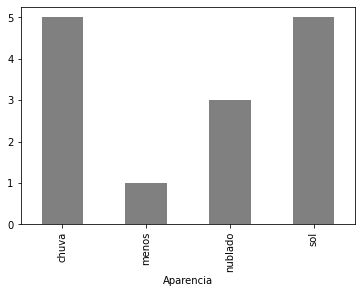

In [5]:
agrupado.plot.bar(color = "grey")

In [6]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [7]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [8]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

C:\Users\julia.V-G-OLIVEIRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

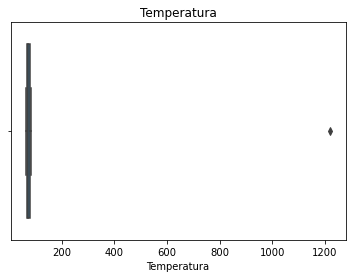

In [9]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

C:\Users\julia.V-G-OLIVEIRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

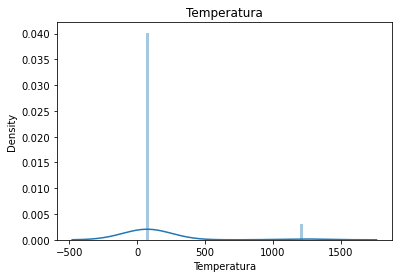

In [10]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [11]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

C:\Users\julia.V-G-OLIVEIRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

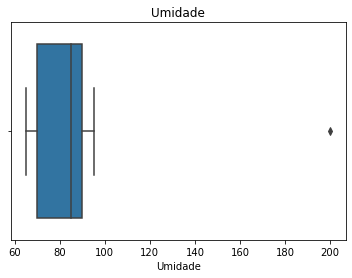

In [12]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

C:\Users\julia.V-G-OLIVEIRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

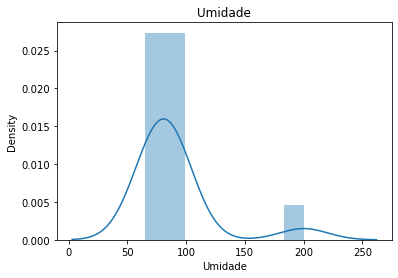

In [13]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [14]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [15]:
mediana_umidade = sts.median(dataset['Umidade'])
mediana_umidade

85.5

In [16]:
dataset['Umidade'].fillna(mediana_umidade, inplace = True)
dataset['Umidade'].isnull().sum()

0

In [17]:
dataset.loc[(dataset['Umidade'] > 100) | (dataset['Umidade'] < 0 )]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim


In [18]:
dataset.loc[(dataset['Umidade'] > 100) | (dataset['Umidade'] < 0 ),'Umidade'] = mediana_umidade
dataset.loc[(dataset['Umidade'] > 100) | (dataset['Umidade'] < 0 )]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [19]:
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    2
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

In [20]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [21]:
moda = sts.mode(dataset['Vento'])
dataset['Vento'].fillna(moda, inplace = True)
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [22]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [23]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [24]:
# dataset.loc[dataset['Aparencia'] == 'menos'] = 'chuva'
dataset.loc[~dataset['Aparencia'].isin(['chuva','sol','nublado']),'Aparencia'] = 'chuva' # ~ nega o "isin"
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

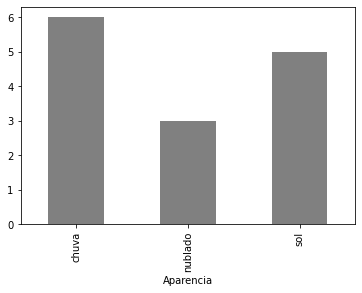

In [25]:
agrupado.plot.bar(color = "grey")

In [26]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [27]:
mediana_temp = sts.median(dataset['Temperatura'])
mediana_temp

73.5

In [28]:
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [29]:
dataset.loc[(dataset['Temperatura'] < -130)  | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [30]:
dataset.loc[(dataset['Temperatura'] < -130)  | (dataset['Temperatura'] > 130)] = mediana_temp
dataset.loc[(dataset['Temperatura'] < -130)  | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [31]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [32]:
dataset.shape

(14, 5)